In [1]:
% matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functions_lib import CrowdCounter

In [2]:
# Initialize CrowCounter Class
crowd_detector = CrowdCounter()

In [3]:
# Library to read multiple files
img1, img2, img3 = crowd_detector.mutlifile_read('images/DJI_0273.JPG', 'images/DJI_0274.JPG', 'images/DJI_0276.JPG')

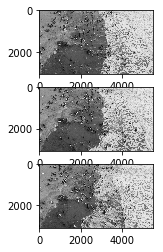

In [4]:
plt.subplot(3, 1, 1), plt.imshow(img1)
plt.subplot(3, 1, 2),plt.imshow(img2)
plt.subplot(3, 1, 3),plt.imshow(img3)
plt.show()

In [5]:
# diff1, .. are images with background subtracted from them
diff1, diff2, diff3 = crowd_detector.background_subtraction(img1, img2, img3)
crowd_detector.multifile_write(['diff1.jpg', diff1], ['diff2.jpg', diff2], ['diff3.jpg', diff3])

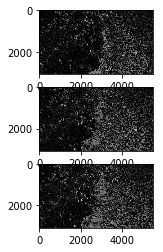

In [6]:
plt.subplot(3, 1, 1), plt.imshow(diff1)
plt.subplot(3, 1, 2),plt.imshow(diff2)
plt.subplot(3, 1, 3),plt.imshow(diff3)
plt.show()

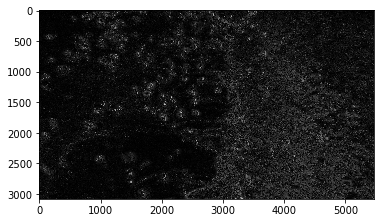

In [7]:
# The image is high pass filtered to remove low frequency components
diff1 = crowd_detector.high_pass_filtering('diff1.jpg')
plt.imshow(diff1, cmap='gray'),plt.show()

In [8]:
crowd_detector.multifile_write(['diff1.jpg', diff1], ['diff2.jpg', diff2], ['diff3.jpg', diff3])

In [9]:
# Image is thresholded to obtain a demarcation
diff1 = cv2.imread('diff1.jpg', cv2.IMREAD_GRAYSCALE)
bin1 = cv2.threshold(diff1, 80, 255, cv2.THRESH_BINARY)
print bin1

(80.0, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))


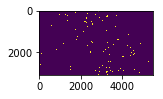

In [10]:
plt.subplot(3, 1, 1),plt.imshow(bin1[1])
# plt.subplot(3, 1, 2),plt.imshow(bin2[1])
# plt.subplot(3, 1, 3),plt.imshow(bin3[1])
plt.show()

In [11]:
crowd_detector.multifile_write(['bin1.jpg', bin1[1]])

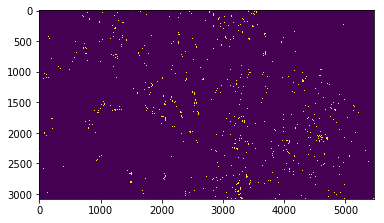

(<matplotlib.image.AxesImage at 0x7fc29f0b12d0>, None)

In [16]:
img = cv2.imread('bin1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img), plt.show()

In [17]:
# Elliptical structuring element is picked due to shape of object to be detected and opening operation is performed
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
morphed = crowd_detector.morph_operations(kernel, img, "open")

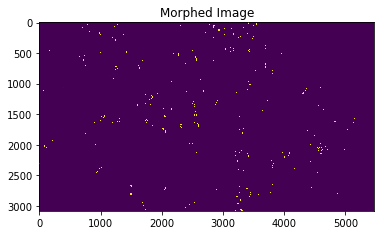

(<matplotlib.image.AxesImage at 0x7fc29f3e2b50>,
 None)

In [18]:
plt.imshow(morphed),plt.title('Morphed Image'),plt.show()

In [19]:
morphed = cv2.blur(morphed, (10, 10))
crowd_detector.multifile_write(['post-morph.jpg', morphed])

In [20]:
# Simple Blob detector is then used to count number of people in the image
crowd_detector.blob_detect_set_params()
count_image, points =  crowd_detector.run_blob_detector(morphed, img1)


In [23]:
print count_image

[[[157 157 157]
  [157 157 157]
  [155 155 155]
  ..., 
  [220 220 220]
  [220 220 220]
  [220 220 220]]

 [[166 166 166]
  [163 163 163]
  [158 158 158]
  ..., 
  [222 222 222]
  [221 221 221]
  [219 219 219]]

 [[175 175 175]
  [169 169 169]
  [159 159 159]
  ..., 
  [222 222 222]
  [222 222 222]
  [219 219 219]]

 ..., 
 [[114 114 114]
  [121 121 121]
  [126 126 126]
  ..., 
  [221 221 221]
  [223 223 223]
  [223 223 223]]

 [[122 122 122]
  [130 130 130]
  [127 127 127]
  ..., 
  [209 209 209]
  [215 215 215]
  [220 220 220]]

 [[138 138 138]
  [138 138 138]
  [125 125 125]
  ..., 
  [200 200 200]
  [207 207 207]
  [214 214 214]]]


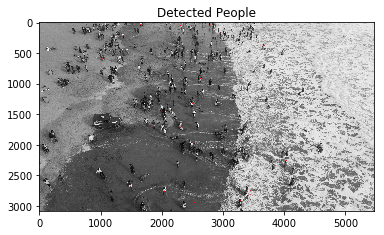

Detected People Count: 279


In [26]:
plt.imshow(count_image), plt.title('Detected People'), plt.show()
print "Detected People Count: "+ str(len(points))

In [28]:
crowd_detector.multifile_write(['post-detection.jpg', count_image])